# <div align="center">Using the Chronicling America API

When you search on the Chronicling America website, you can see all the search parameters that you have set are included in the URL of the search results: 

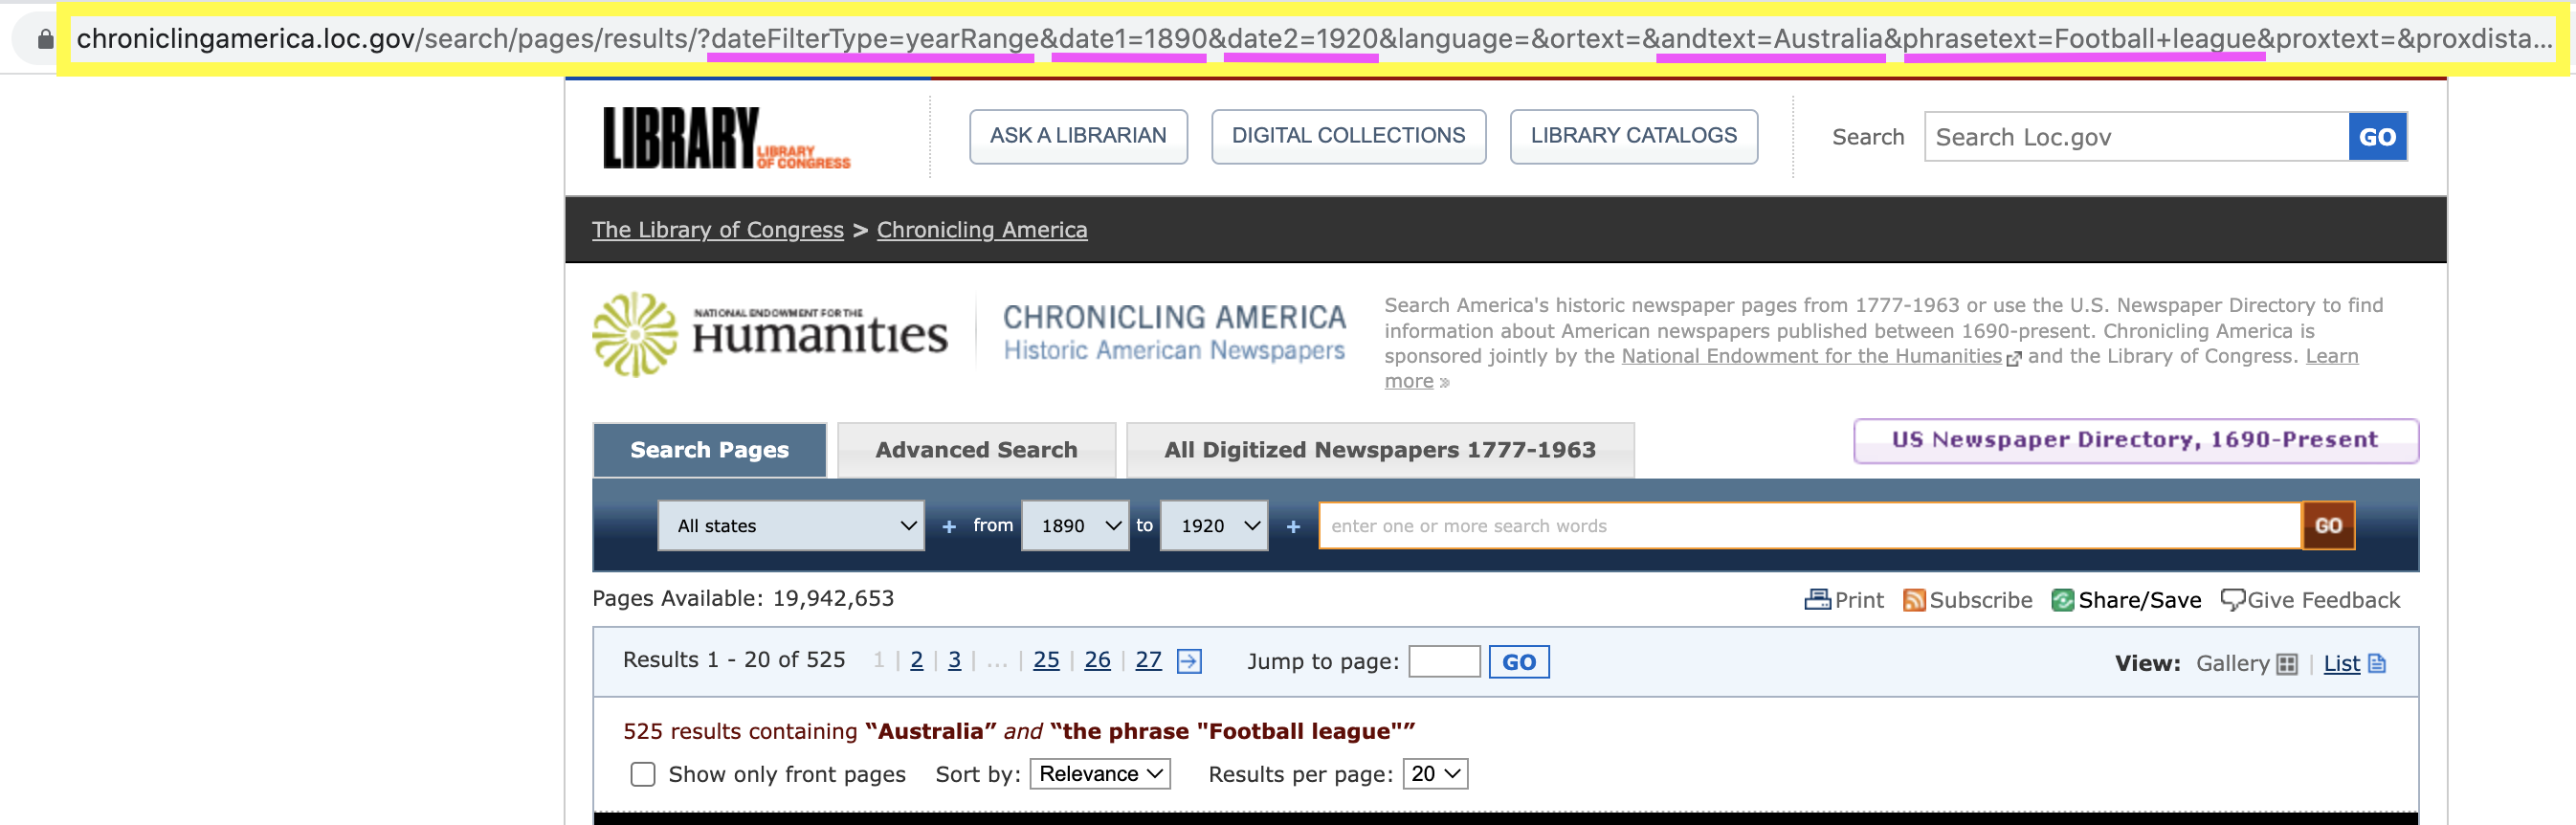

We can use the [Requests](https://requests.readthedocs.io/en/latest/user/quickstart/) package to access the Chronicling America API to get the data directly, without needing to use the website. 

This is also possible with other resources, such as [Trove](https://trove.nla.gov.au), however, you will usually be required to provide an API key. [Getting an API for Trove](https://trove.nla.gov.au/about/create-something/using-api) as a researcher is quite simple, however for the purposes of demonstration we decided to use Chronicling America, which does not require you all to have an individual API key. 

To use Requests, first we need to import it:

In [ ]:
import requests 

Then we need to create what's called a response object, by passing the URL of the API. For Chronicling America, doing a search for articles, the URL would be ```https://chroniclingamerica.loc.gov/search/pages/results/```, plus the search parameters. 

In [ ]:
r = requests.get('https://chroniclingamerica.loc.gov/search/pages/results/')

We could manually add our search parameters to the URL, by adding a question mark, and then an ampersand between each parameter, e.g. 
```'https://chroniclingamerica.loc.gov/search/pages/results/?andtext=Australia&phrasetext=Football+league'```

However, Requests lets you pass a dictionary of your parameters instead, which is clearer and easier: 

In [ ]:
search_params = {
    'andtext': 'Australia', 
    'phrasetext': 'Football league',
    'dateFilterType': 'yearRange',
    'date1': '1890',
    'date2': '1920',
    }

r = requests.get('https://chroniclingamerica.loc.gov/search/pages/results/', params=search_params)

We can see the search URL created by calling ```r.url```. If we print it, it will be a hyperlink that we can follow to Chronicling America. 

In [ ]:
print(r.url)

We can see the HTML contents of the page by calling ```r.text```:

In [ ]:
print(r.text)

But to be able to use the data from the API search, we want to have it in a structured format, such as JSON, which can be converted into a Python dictionary. If we were to call the method ```r.json()``` now, we would get an error message, as the default format of the Chronicling America API is html. 

However, it does allow us to specify the format we want the data to come in, with 'json' and 'atom' as the other option (atom produces data in another structured format, XML). To do this, you need to set the 'format' parameter: 

In [ ]:
search_params = {
    'andtext': 'Australia', 
    'phrasetext': 'Football league',
    'dateFilterType': 'yearRange',
    'date1': '1890',
    'date2': '1920',
    'format': 'json',
    }

r = requests.get('https://chroniclingamerica.loc.gov/search/pages/results/', params=search_params)

In [ ]:
print(r.url)

In [ ]:
r.json()

This will give you the first page of results (The default is 20 items per page, you can change this by setting the 'rows' parameter). 

You can see here the different pieces of metadata you can collect, as well as the OCR text results. 

You would then need to loop through each page by updating the 'page' parameter, e.g.:

In [ ]:
search_params = {
    'andtext': 'Australia', 
    'phrasetext': 'Football league',
    'dateFilterType': 'yearRange',
    'date1': '1890',
    'date2': '1920',
    'format': 'json',
    'page': '2'
    }

r = requests.get('https://chroniclingamerica.loc.gov/search/pages/results/', params=search_params)
r.json()

Try it again with your own search terms! 

Some API results include a 'next_page' parameter, but unfortunatly Chronicling America does not. You may then wish to use a function to help loop through the page results. 

Similarly, if you are running a lot of searches, you may want a function to combine some of these steps, as well as formatting your results. 

I have written some functions to cover do these things, and compiled them into a package called [chron_am_search](https://gitlab.unimelb.edu.au/mdap-public/chronicling-america), which is available on gitlab, if you want to explore using the Chronicling America API further. (note, it is still a work in progress!)

**To install**:

*In a notebook*
In the first cell, run: 
```
! pip install git+https://gitlab.unimelb.edu.au/mdap-public/chronicling-america.git
```

OR 

*In Terminal*
```
pip install git+https://gitlab.unimelb.edu.au/mdap-public/chronicling-america.git
```

**To use**:

#### 1. Import chron_am_search
Import the package

```
import chron_am_search
from chron_am_search.utils import Search
```

In [ ]:
import chron_am_search.search_functions 
from chron_am_search.search_functions import *

#### 2. Create a Search Object

Create a Search Object, including your search parameters: 

```
search_name = Search(param1='this', param2='that', param3=['here', 'there', 'everywhere'], param4='1900'))
```

It is recommended to also run the ```result_count()``` method the first time you create a search, before the next step, to check the size of the search results. 

```
search_name.result_count
```

In [ ]:
search = Search(andtext='Australia', 
                phrasetext='Football league',
                dateFilterType='yearRange',
                date1='1890',
                date2='1920')

search.result_count()

#### 3. Search Results to Dataframe

Run ```Search.search_to_frame()``` to compile each page of the search results, and output to a dataframe. The function includes a default dataframe cleaning and formatting process - include the parameter ```clean=False``` to disable this. 

```
df = search_name.search_to_frame()
```


In [ ]:
df = search.search_to_frame()

### 4. Export to Excel

To save a copy of your search results or continue working in Excel (characters contained in the OCR search results cause errors if exporting to CSV)

```
export_excel(df)
```

In [ ]:
export_excel(df)

### The available search parameters when searching the Chronicling America database are:
* **andtext**: find all of the given words
  * *Entered as:* a string (within quotation marks); words seperated by space only, no commas
  
* **ortext**: find any of the given words
  * *Entered as:* a string (within quotation marks); words seperated by space only, no commas
  * *Available options:* All 50 US States, District of Columbia, American Samoa, Mariana Islands, Puerto Rico, Virgin Island
  
* **phrasetext**: find the given words as a phrase.
  * *Entered as:* a string (within quotation marks); words seperated by space only, no commas
  * *Note* - It will still search the words in any order, as long as they are together, but the results with the order you provide will come first. 
  
* **proxText**: find the given words within a specified proximity (must also give proximity value)
  * *Entered as:* a string (within quotation marks)
  
* **proximityValue**: how close together the words in a proximity search need to be (only applies to words in the proxText option)
  * *Entered as:* a string (within quotation marks)
  * *Default:* 1690
  
* **dateFilterType**: choosing the date format when searching within a date range
  * *Entered as:* a string (within quotation marks)
  * *Available options:* range (to search mm/dd/yyyy), yearRange (to search yyyy)
  
* **date1**: from date (year or mm/dd/yyyy) when searching within a date range
  * *Entered as:* a string (within quotation marks)
  
* **date2**: to date (year or mm/dd/yyyy) when searching within a date range
  * *Entered as:* a string (within quotation marks)
  
* **state**: list of states wanting to include (leave blank for all states)
  * *Entered as:* a string (within quotation marks) if one state; a list of strings (within square brackets) for multiple states
  
* **lccn**: list of newspapers wanting to limit the search to (leave blank for all newspapers)
  * *Entered as:* a string (within quotation marks) containing the newspaper LCCN for one newspaper; a list of strings (within square brackets), each containing a newspaper LCCN, for multiple states
  * *Note* - can get a correctly formatted list of LCCNs by running a title search for the newspapers you want, using the [list_newspaper_lccns() function](#lccn_list)
  
* **sequence**: Image sequence number for the issue of the paper being searched - Most often corresponds with the page number. For example, to search only for results appearing on the front page of a newspaper, sequence number should be 1. 
  * *Entered as:* a string (within quotation marks)
